# Football Match Predictor - Data Exploration

Exploring 1834 matches from Premier League, La Liga and Champions League

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/raw_matches.csv')
print(f'Dataset shape: {df.shape}')
df.head(10)

Dataset shape: (1834, 10)


,league,league_code,season,date,home_team,away_team,home_goals,away_goals,outcome,matchday
0,Premier League,PL,2023,2023-08-11T19:00:00Z,Burnley FC,Manchester City FC,0,3,AWAY_WIN,1.0
1,Premier League,PL,2023,2023-08-12T12:00:00Z,Arsenal FC,Nottingham Forest FC,2,1,HOME_WIN,1.0
2,Premier League,PL,2023,2023-08-12T14:00:00Z,AFC Bournemouth,West Ham United FC,1,1,DRAW,1.0
3,Premier League,PL,2023,2023-08-12T14:00:00Z,Brighton & Hove Albion FC,Luton Town FC,4,1,HOME_WIN,1.0
4,Premier League,PL,2023,2023-08-12T14:00:00Z,Everton FC,Fulham FC,0,1,AWAY_WIN,1.0
5,Premier League,PL,2023,2023-08-12T14:00:00Z,Sheffield United FC,Crystal Palace FC,0,1,AWAY_WIN,1.0
6,Premier League,PL,2023,2023-08-12T16:30:00Z,Newcastle United FC,Aston Villa FC,5,1,HOME_WIN,1.0
7,Premier League,PL,2023,2023-08-13T13:00:00Z,Brentford FC,Tottenham Hotspur FC,2,2,DRAW,1.0
8,Premier League,PL,2023,2023-08-13T15:30:00Z,Chelsea FC,Liverpool FC,1,1,DRAW,1.0
9,Premier League,PL,2023,2023-08-14T19:00:00Z,Manchester United FC,Wolverhampton Wanderers FC,1,0,HOME_WIN,1.0


In [2]:
# Basic info
print('Dataset Info:')
df.info()
print('\nMissing values:')
print(df.isnull().sum())

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   league       1834 non-null   str    
 1   league_code  1834 non-null   str    
 2   season       1834 non-null   int64  
 3   date         1834 non-null   str    
 4   home_team    1834 non-null   str    
 5   away_team    1834 non-null   str    
 6   home_goals   1834 non-null   int64  
 7   away_goals   1834 non-null   int64  
 8   outcome      1834 non-null   str    
 9   matchday     1833 non-null   float64
dtypes: float64(1), int64(3), str(6)
memory usage: 143.4 KB

Missing values:
league         0
league_code    0
season         0
date           0
home_team      0
away_team      0
home_goals     0
away_goals     0
outcome        0
matchday       1
dtype: int64


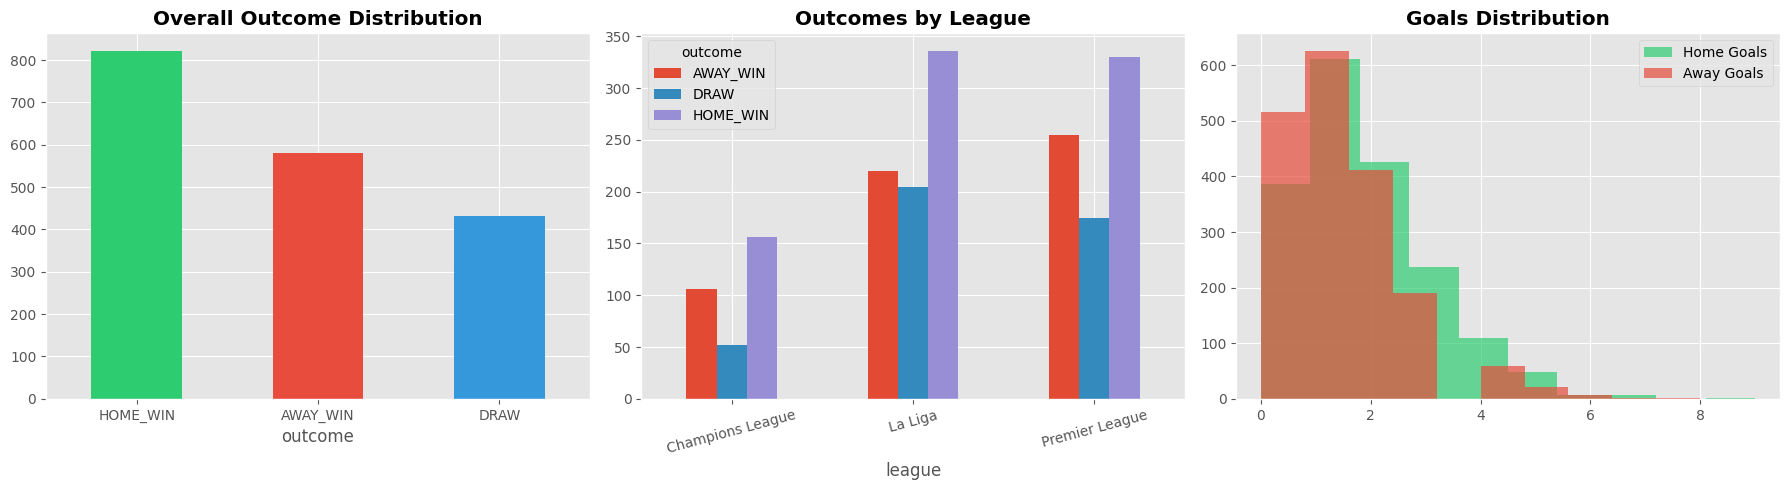

In [3]:
# Outcome distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Overall outcomes
df['outcome'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71','#e74c3c','#3498db'])
axes[0].set_title('Overall Outcome Distribution', fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Outcomes by league
outcome_by_league = df.groupby(['league','outcome']).size().unstack()
outcome_by_league.plot(kind='bar', ax=axes[1])
axes[1].set_title('Outcomes by League', fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=15)

# Goals distribution
axes[2].hist(df['home_goals'], bins=10, alpha=0.7, label='Home Goals', color='#2ecc71')
axes[2].hist(df['away_goals'], bins=10, alpha=0.7, label='Away Goals', color='#e74c3c')
axes[2].set_title('Goals Distribution', fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()

In [4]:
# Barcelona specific stats!
barca_home = df[df['home_team'].str.contains('Barcelona', case=False, na=False)]
barca_away = df[df['away_team'].str.contains('Barcelona', case=False, na=False)]
barca_all = pd.concat([barca_home, barca_away])

print(f'Total Barcelona matches: {len(barca_all)}')
print(f'\nHome matches: {len(barca_home)}')
print(f'Away matches: {len(barca_away)}')
print(f'\nHome results:')
print(barca_home['outcome'].value_counts())
print(f'\nAway results:')
print(barca_away['outcome'].value_counts())

Total Barcelona matches: 138

Home matches: 69
Away matches: 69

Home results:
outcome
HOME_WIN    46
AWAY_WIN    13
DRAW        10
Name: count, dtype: int64

Away results:
outcome
AWAY_WIN    34
HOME_WIN    22
DRAW        13
Name: count, dtype: int64


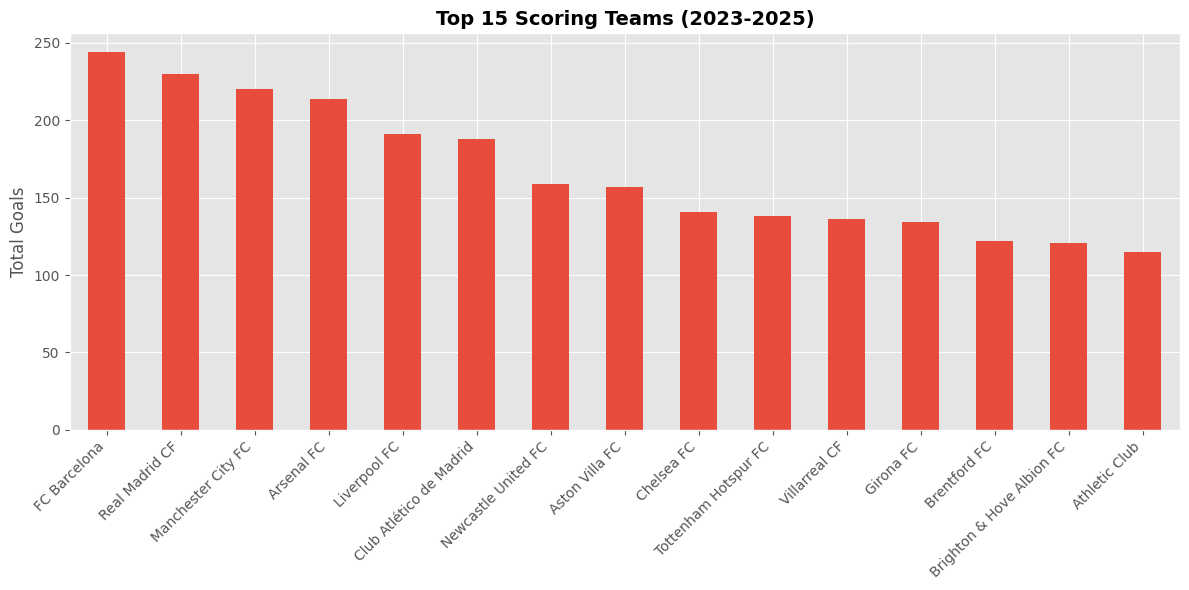

In [5]:
# Top scoring teams
home_goals = df.groupby('home_team')['home_goals'].sum()
away_goals = df.groupby('away_team')['away_goals'].sum()

# Combine home and away goals
all_teams = set(df['home_team'].unique()) | set(df['away_team'].unique())
team_goals = {}
for team in all_teams:
    hg = home_goals.get(team, 0)
    ag = away_goals.get(team, 0)
    team_goals[team] = hg + ag

goals_df = pd.Series(team_goals).sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
goals_df.plot(kind='bar', color='#e74c3c')
plt.title('Top 15 Scoring Teams (2023-2025)', fontweight='bold', fontsize=14)
plt.ylabel('Total Goals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
# Home advantage analysis
total = len(df)
home_wins = len(df[df['outcome'] == 'HOME_WIN'])
away_wins = len(df[df['outcome'] == 'AWAY_WIN'])
draws = len(df[df['outcome'] == 'DRAW'])

print('=== HOME ADVANTAGE ANALYSIS ===')
print(f'Home Win Rate: {home_wins/total:.1%}')
print(f'Away Win Rate: {away_wins/total:.1%}')
print(f'Draw Rate:     {draws/total:.1%}')
print(f'\nAverage Home Goals: {df["home_goals"].mean():.2f}')
print(f'Average Away Goals: {df["away_goals"].mean():.2f}')
print(f'\nHome advantage is real!' if home_wins > away_wins else 'Interesting - no clear home advantage!')

=== HOME ADVANTAGE ANALYSIS ===
Home Win Rate: 44.8%
Away Win Rate: 31.7%
Draw Rate:     23.5%

Average Home Goals: 1.61
Average Away Goals: 1.32

Home advantage is real!
